In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/Users/krishnapeddibhotla/Downloads/bitcoin_2017_to_2023.csv')
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [7]:
df.shape

(3126000, 10)

In [9]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


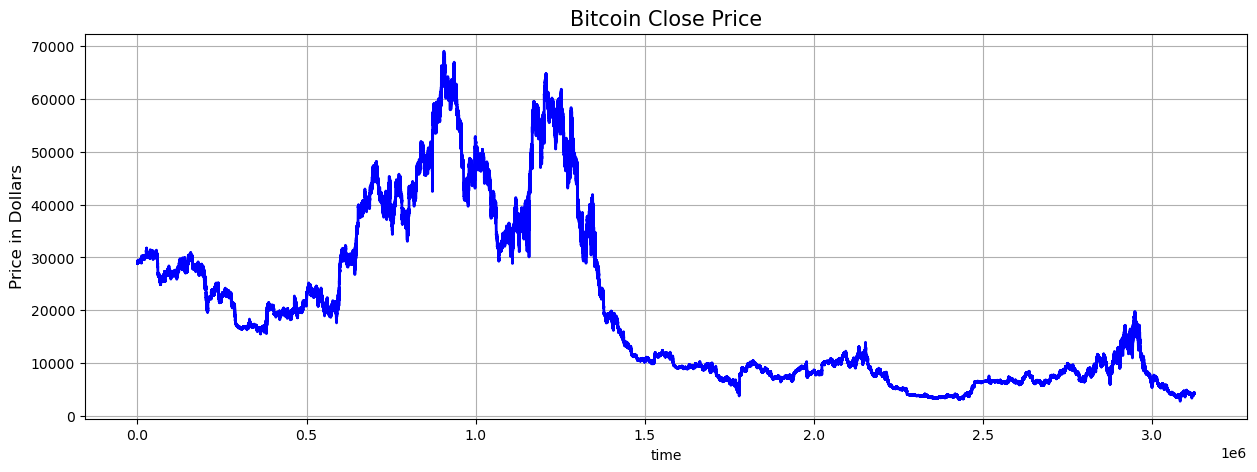

In [17]:
import matplotlib.pyplot as plt

# Plot the 'Close' prices of Bitcoin
plt.figure(figsize=(15, 5))
plt.plot(df['close'], color='blue', linewidth=2)  # Added color and linewidth for better visualization
plt.title('Bitcoin Close Price', fontsize=15)
plt.xlabel('time')  # Added x-axis label for clarity
plt.ylabel('Price in Dollars', fontsize=12)  # Improved y-axis label
plt.grid(True)  # Added grid for better readability
plt.show()


In [23]:
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

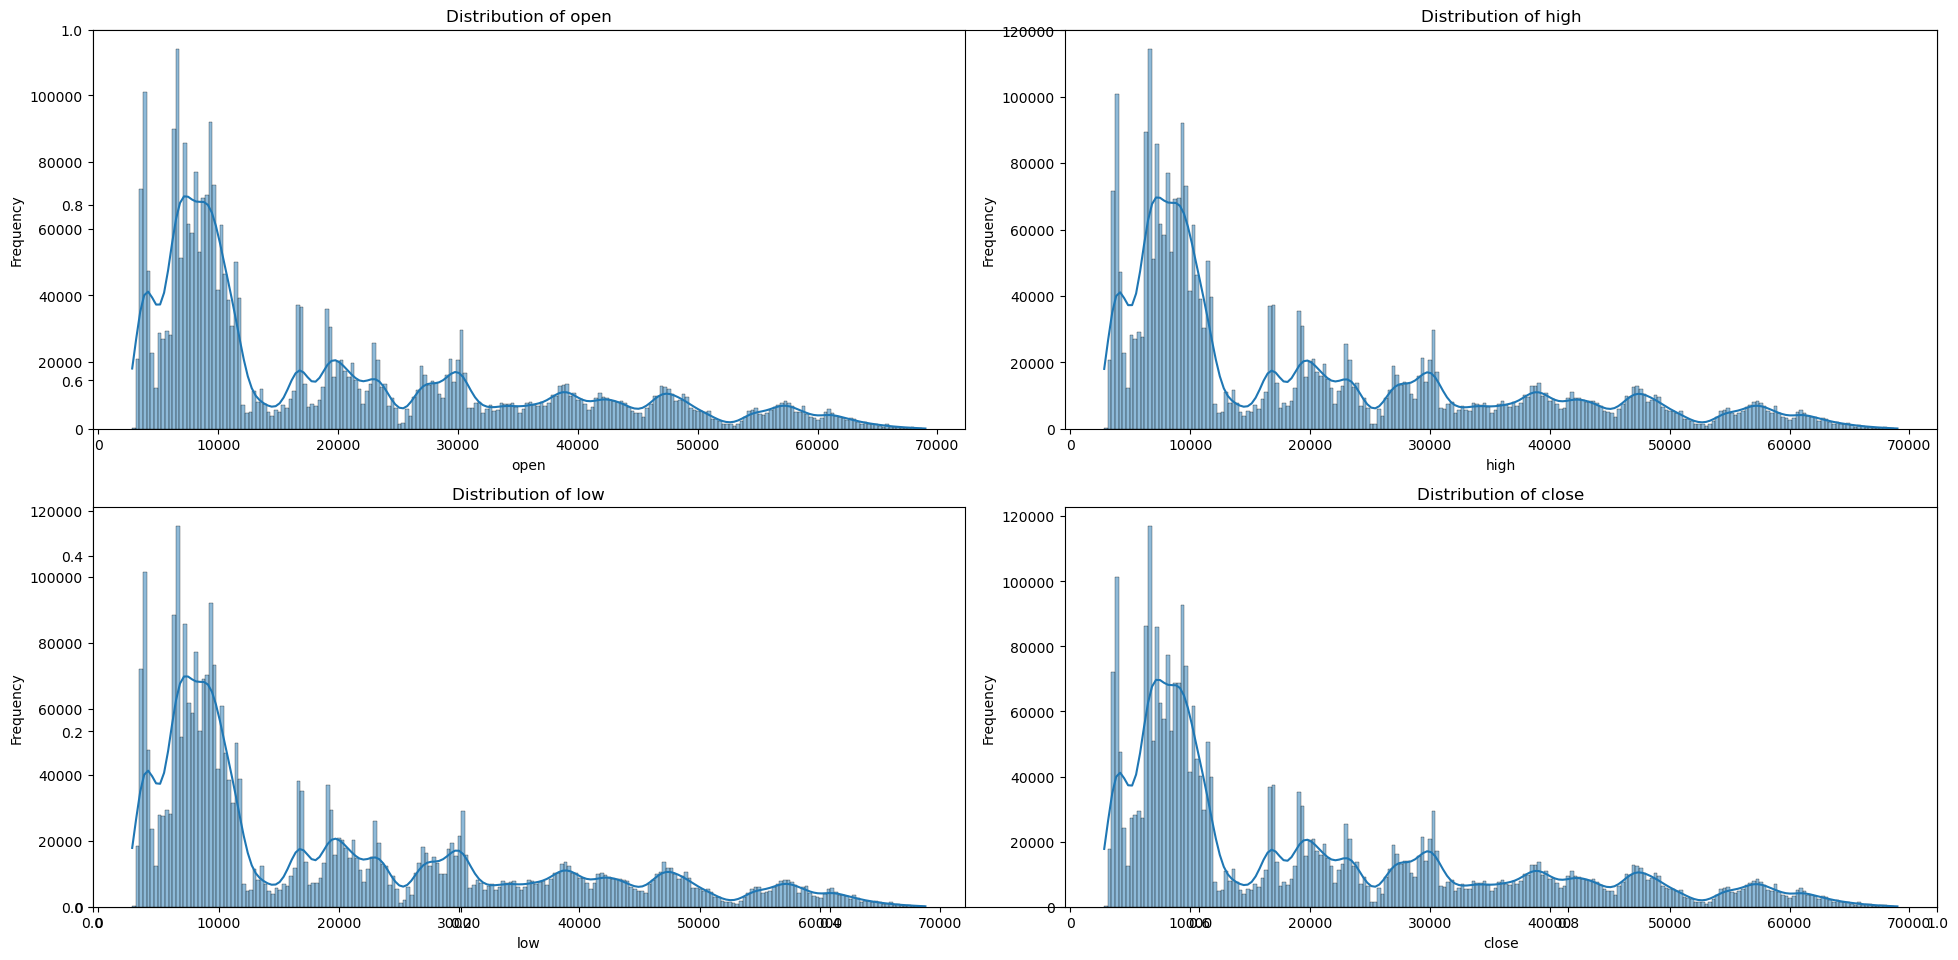

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb

# List of features to plot
features = ['open', 'high', 'low', 'close']

# Create subplots
plt.subplots(figsize=(20, 10))

# Plot each feature in a separate subplot
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.histplot(df[col], kde=True)  # Using histplot with KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

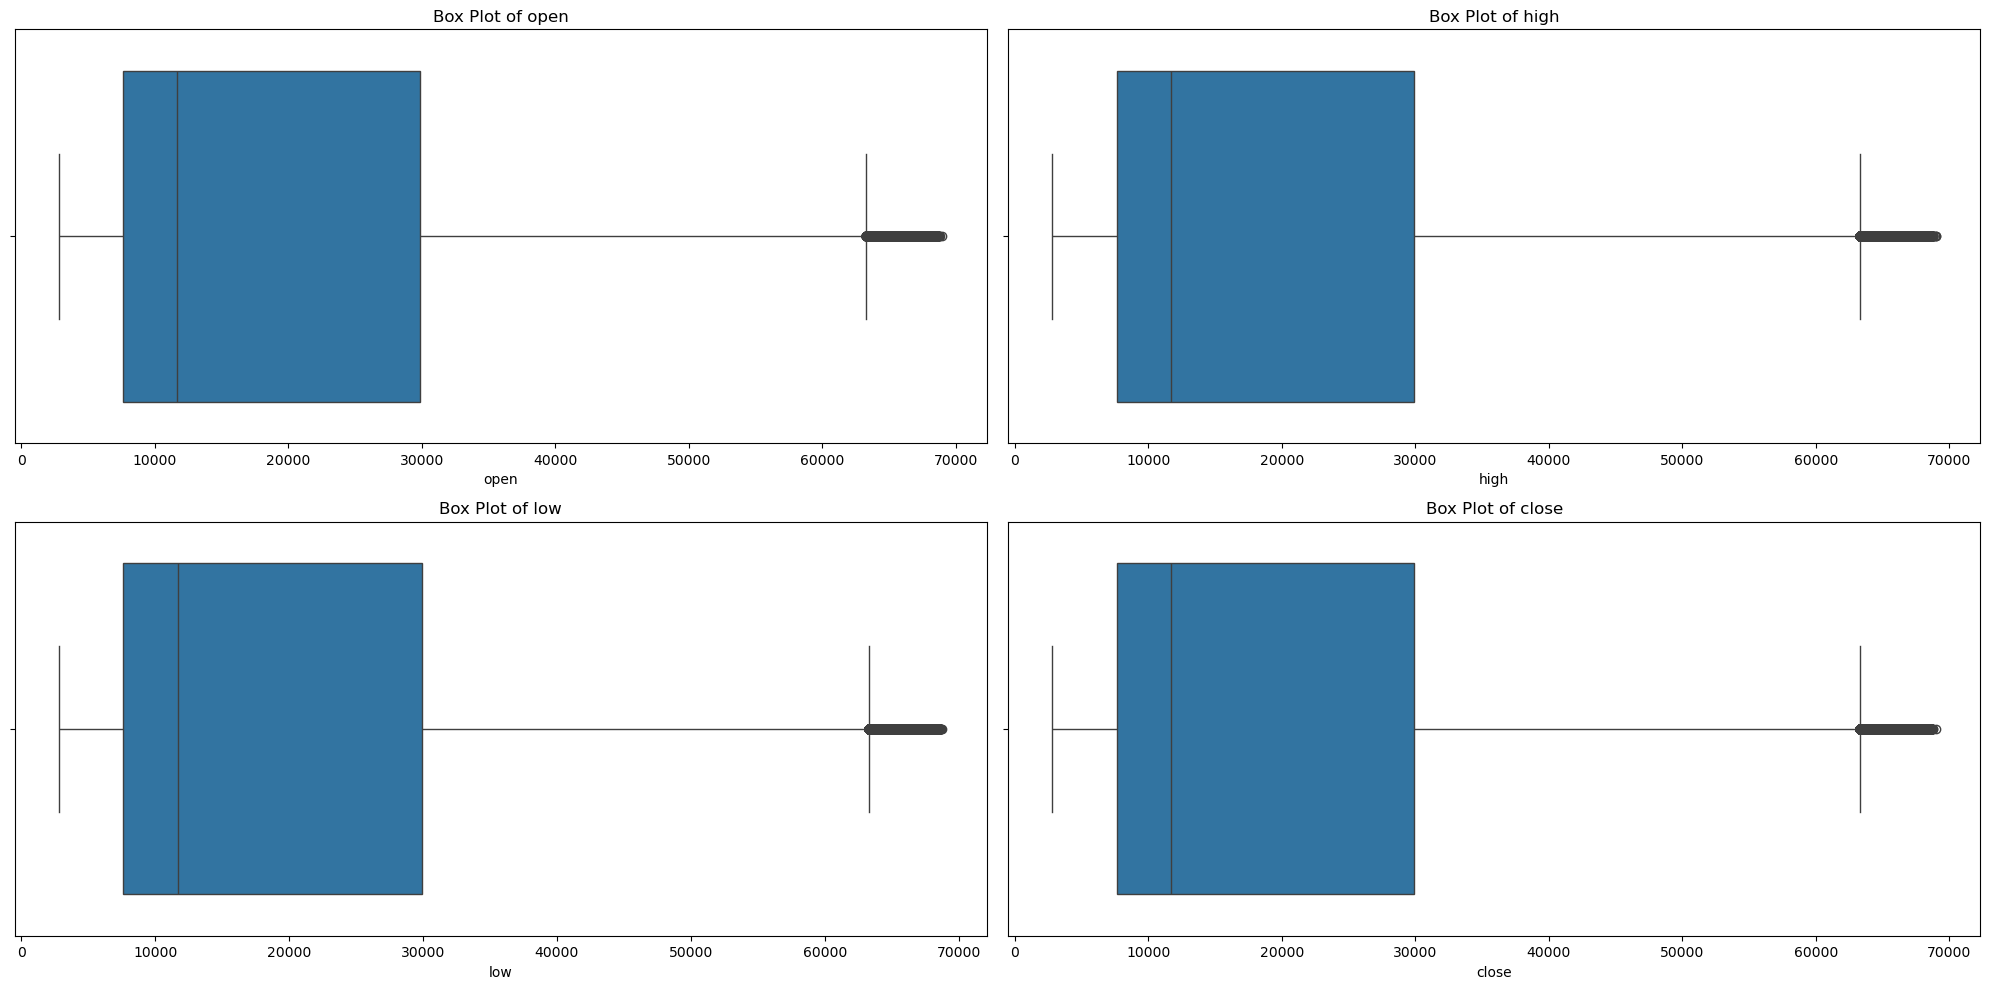

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb

# List of features to plot
features = ['open', 'high', 'low', 'close']

# Create a figure with subplots
plt.figure(figsize=(20, 10))

# Loop through the features and create a box plot for each
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [37]:
splitted = df['timestamp'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')

df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,year,month
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836,2023,8
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195,2023,8
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121,2023,8
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916,2023,8
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611,2023,8


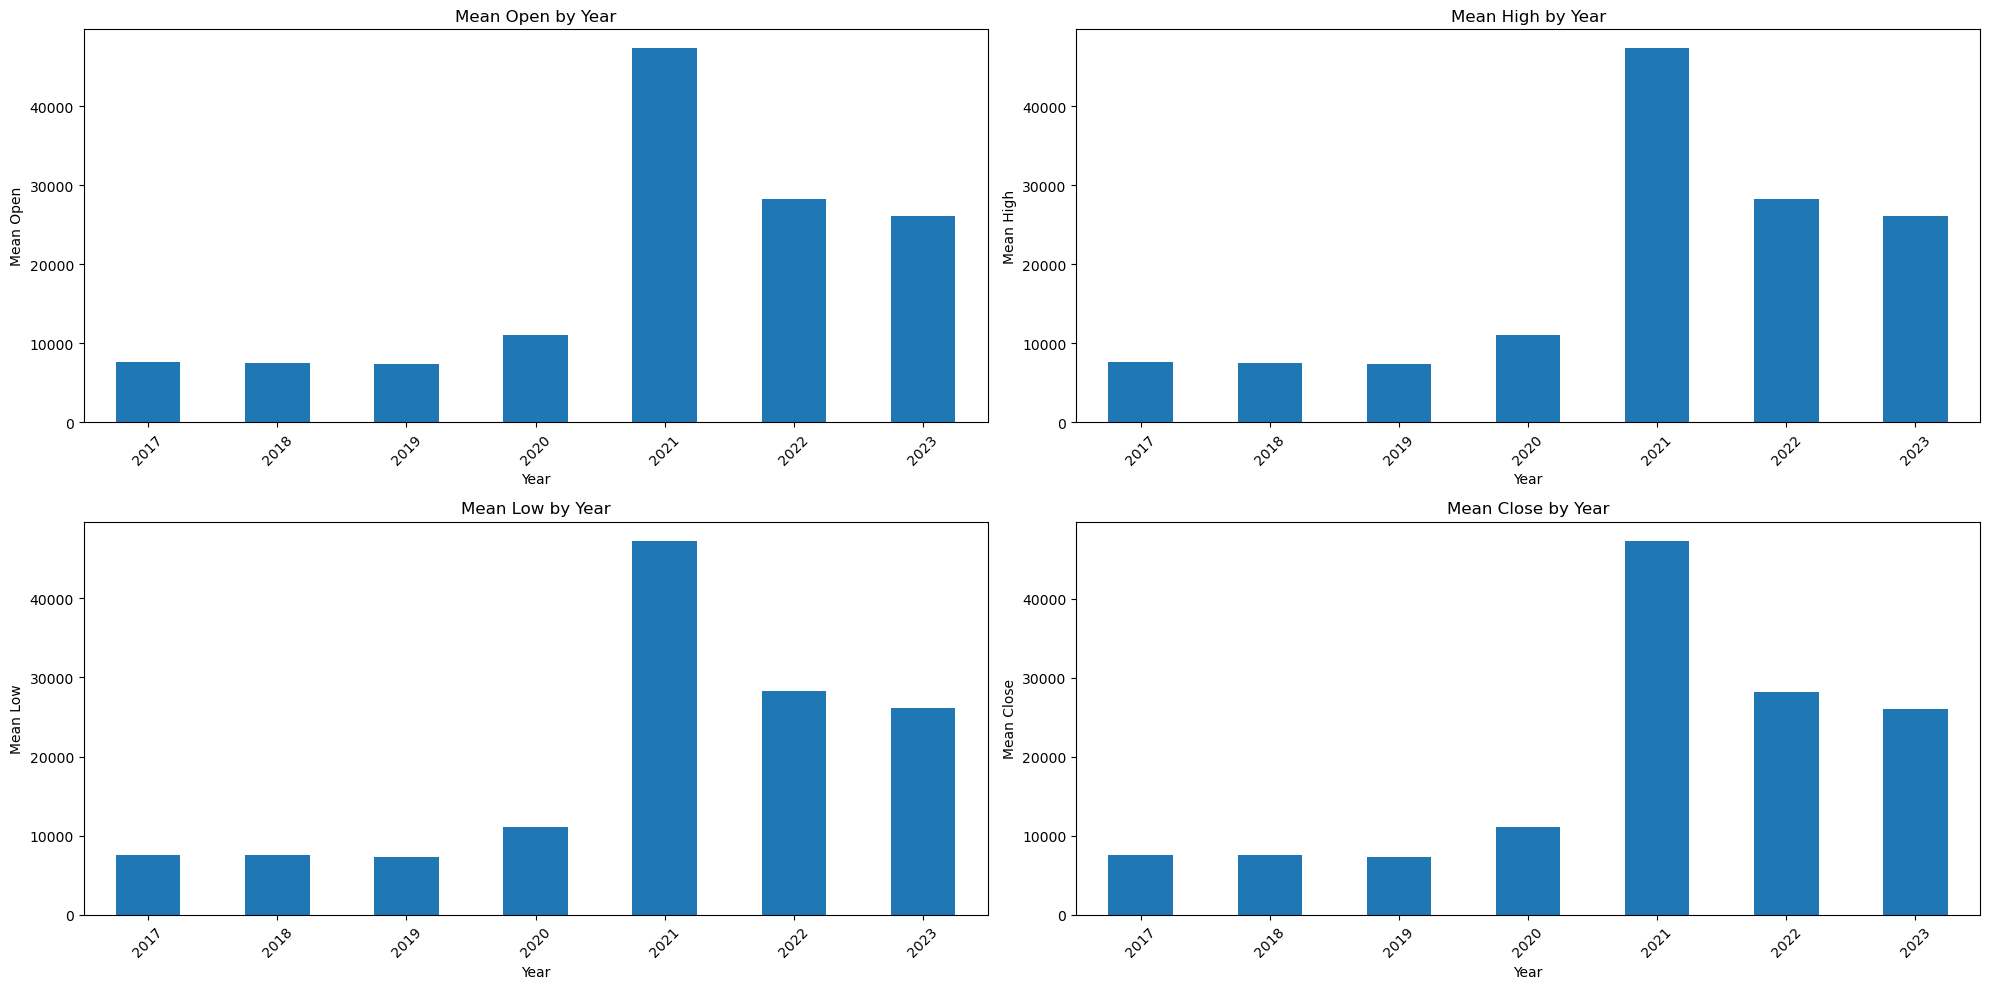

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (assuming you have this DataFrame already)
# df = pd.read_csv('your_data.csv')

# Ensure that columns are numeric (convert if needed)
numeric_cols = df[['open', 'high', 'low', 'close']].apply(pd.to_numeric, errors='coerce')

# Group by 'year' and compute the mean for numeric columns
data_grouped = numeric_cols.groupby(df['year']).mean()

# Create a figure with subplots
plt.figure(figsize=(20, 10))

# Loop through the numeric columns and create a bar plot for each
for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot(kind='bar')
    plt.title(f'Mean {col.capitalize()} by Year')
    plt.xlabel('Year')
    plt.ylabel(f'Mean {col.capitalize()}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [45]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,year,month,is_quarter_end
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836,2023,8,0
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195,2023,8,0
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121,2023,8,0
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916,2023,8,0
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611,2023,8,0


In [49]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

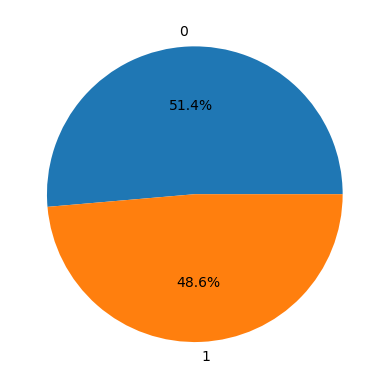

In [51]:
plt.pie(df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

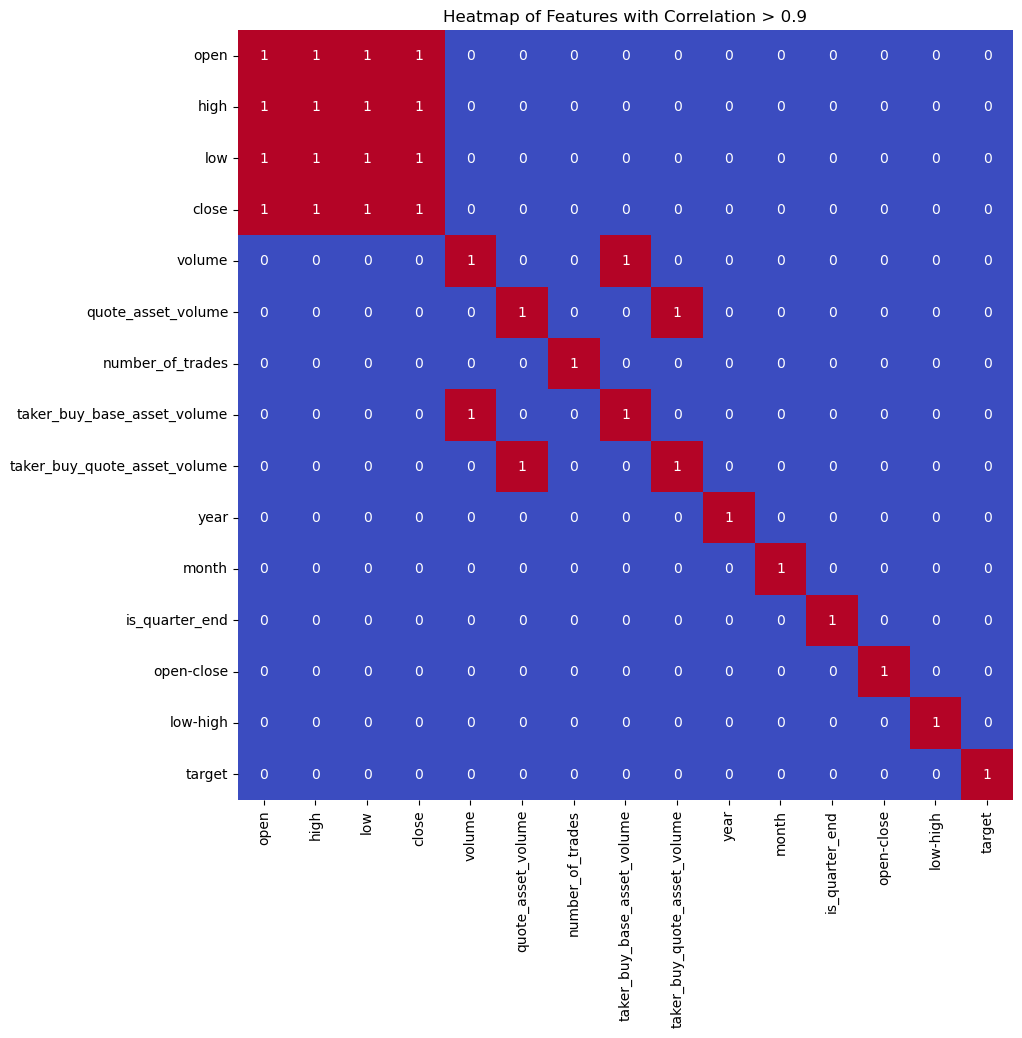

In [57]:
import matplotlib.pyplot as plt
import seaborn as sb

# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a binary matrix indicating high correlation (greater than 0.9)
high_corr_matrix = (corr_matrix > 0.9).astype(int)

# Plot the heatmap
plt.figure(figsize=(10, 10))
sb.heatmap(high_corr_matrix, annot=True, cbar=False, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Features with Correlation > 0.9')
plt.show()

In [59]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2813400, 3) (312600, 3)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# Define the models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Fit and evaluate each model
for model in models:
    # Fit the model
    model.fit(X_train, Y_train)
    
    # Print model details
    print(f'{model} : ')
    
    # Calculate and print training accuracy (ROC AUC score)
    train_roc_auc = metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    print('Training Accuracy : ', train_roc_auc)
    
    # Calculate and print validation accuracy (ROC AUC score)
    valid_roc_auc = metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1])
    print('Validation Accuracy : ', valid_roc_auc)
    
    print()

LogisticRegression() : 
Training Accuracy :  0.9776534005284303
Validation Accuracy :  0.9771774571884798



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Fit the model (if not already fitted)
models[0].fit(X_train, Y_train)

# Plot the confusion matrix for the first model
plt.figure(figsize=(10, 7))
plot_confusion_matrix(models[0], X_valid, Y_valid, cmap='Blues', display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.show()